In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/HenriqueToledo/Semantic-segmentation-applied-to-crop-rows.git

fatal: destination path 'Semantic-segmentation-applied-to-crop-rows' already exists and is not an empty directory.


In [ ]:
!unzip /content/detecting-crop-rows-from-image-data.zip

Archive:  /content/detecting-crop-rows-from-image-data.zip
  inflating: Images/Images/.ds_store  
  inflating: Images/Images/.ipynb_checkpoints/Crop Row Data - prepare dataset-checkpoint.ipynb  
  inflating: Images/Images/crop_row_001.jpg  
  inflating: Images/Images/crop_row_002.jpg  
  inflating: Images/Images/crop_row_003.jpg  
  inflating: Images/Images/crop_row_004.jpg  
  inflating: Images/Images/crop_row_005.jpg  
  inflating: Images/Images/crop_row_006.jpg  
  inflating: Images/Images/crop_row_007.jpg  
  inflating: Images/Images/crop_row_008.jpg  
  inflating: Images/Images/crop_row_009.jpg  
  inflating: Images/Images/crop_row_010.jpg  
  inflating: Images/Images/crop_row_011.jpg  
  inflating: Images/Images/crop_row_012.jpg  
  inflating: Images/Images/crop_row_013.jpg  
  inflating: Images/Images/crop_row_014.jpg  
  inflating: Images/Images/crop_row_015.jpg  
  inflating: Images/Images/crop_row_016.jpg  
  inflating: Images/Images/crop_row_017.jpg  
  inflating: Images/Ima

In [ ]:
import numpy as np
import cv2
import os

os.mkdir('/content/train_labels/train_label_images')

dir_path = '/content/train_labels/train_labels'
image_dir_path = '/content/train_labels/train_label_images'
for file in os.listdir(dir_path):
  # print(os.path.join(dir_path, file))
  filename = os.path.splitext(file)[0]
  img_array = np.load(os.path.join(dir_path, file))
  cv2.imwrite(os.path.join(image_dir_path, filename + '.JPG'), img_array)


In [ ]:
import numpy as np
import cv2
import os

os.mkdir('/content/train_labels/test_label_images')

dir_path = '/content/train_labels/train_labels'
image_dir_path = '/content/train_labels/train_label_images'
for file in os.listdir(dir_path):
  # print(os.path.join(dir_path, file))
  filename = os.path.splitext(file)[0]
  img_array = np.load(os.path.join(dir_path, file))
  cv2.imwrite(os.path.join(image_dir_path, filename + '.JPG'), img_array)


In [ ]:
import tensorflow as tf
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import time
import glob 
import random

In [ ]:
import pandas as pd

ids = pd.read_csv('/content/train and test ids.csv')
input_path1 = '/content/Images/Images'
img_list_X_train = []
img_list_X_test = []
for i in ids['train_ids']:
  img_list_X_train.append(os.path.join(input_path1,'crop_row_' + str(i).zfill(3) + '.jpg'))
for i in ids['test_ids']:
  if not np.isnan(i):
    img_list_X_test.append(os.path.join(input_path1,'crop_row_' + str(int(i)).zfill(3) + '.jpg'))

In [79]:
np.save("testimages",img_list_X_test)



In [ ]:
img_width = 240
img_height = 240
img_channels = 3
number_of_init_filters = 16
# train_input_path = '/content/Images/Images/*.jpg'
# train_output_path = '/content/train_labels/train_label_images/*.JPG'

# test_input_path = '/content/Semantic-segmentation-applied-to-crop-rows/Images/Test_dataset/*.JPG'
# test_expected_output = '/content/Semantic-segmentation-applied-to-crop-rows/Images/Test_dataset_ground_truth/*.png'
# test_compare_output = '/content/Semantic-segmentation-applied-to-crop-rows/Images/Test_compare_dataset/*.png'

In [ ]:
X_train = np.zeros((len(img_list_X_train), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_train):
    # read image
    img_train = imread(img_path)
    img_train = resize(img_train, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
    X_train[i] = img_train

In [ ]:
# img_list_X_train = sorted(glob.glob(train_input_path))
# X_train = np.zeros((len(img_list_X_train), img_height, img_width, img_channels), dtype=np.uint8)
# for i, img_path in enumerate(img_list_X_train):
#     # read image
#     img_train = imread(img_path)
#     img_train = resize(img_train, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
#     X_train[i] = img_train

In [ ]:
train_output_path1 = '/content/train_labels/train_label_images'
img_list_y_train = []
for i in ids['train_ids']:
  img_list_y_train.append(os.path.join(train_output_path1,'crop_row_' + str(i).zfill(3) + '.JPG'))
y_train = np.zeros((len(img_list_y_train), img_height, img_width, 1), dtype=bool)
for i, img_path in enumerate(img_list_y_train):
    # read image
    img_train = imread(img_path)
    img_train = resize(img_train, (img_height, img_width, 1), mode='constant', preserve_range='True')
    y_train[i] = img_train

In [ ]:
# img_list_y_train = sorted(glob.glob(train_output_path))
# y_train = np.zeros((len(img_list_y_train), img_height, img_width, 1), dtype=np.bool)
# for i, img_path in enumerate(img_list_y_train):
#     # read image
#     img_train = imread(img_path)
#     img_train = resize(img_train, (img_height, img_width, 1), mode='constant', preserve_range='True')
#     y_train[i] = img_train


In [ ]:
X_test = np.zeros((len(img_list_X_test), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_test):
    # read image
    img_test = imread(img_path)
    img_test = resize(img_test, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
    X_test[i] = img_test

In [ ]:
# #Testing images input
# #X_test = np.zeros((len(test_id), img_height, img_width, img_channels), dtype=np.uint8)

# img_list_X_test = sorted(glob.glob(test_input_path))
# X_test = np.zeros((len(img_list_X_test), img_height, img_width, img_channels), dtype=np.uint8)
# for i, img_path in enumerate(img_list_X_test):
#     # read image
#     img_test = imread(img_path)
#     img_test = resize(img_test, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
#     X_test[i] = img_test

In [ ]:
#Testing images output comparation ExG

img_list_y_test_compare = sorted(glob.glob(test_compare_output))
y_test_compare = np.zeros((len(img_list_y_test_compare), img_height, img_width, 1), dtype=np.bool)
for i, img_path in enumerate(img_list_y_test_compare):
    # read image
    img_test = imread(img_path)
    img_test = resize(img_test, (img_height, img_width, 1), mode='constant', preserve_range='True')
    y_test_compare[i] = img_test

NameError: ignored

In [ ]:
test_output_path1 = '/content/train_labels/train_label_images'
img_list_y_test = []
for i in ids['test_ids']:
  img_list_y_test.append(os.path.join(test_output_path1,'crop_row_' + str(i).zfill(3) + '.JPG'))
y_test = np.zeros((len(img_list_y_test), img_height, img_width, 1), dtype=np.bool)
for i, img_path in enumerate(img_list_y_test):
    # read image
    img_test = imread(img_path)
    img_test = resize(img_test, (img_height, img_width, 1), mode='constant', preserve_range='True')
    y_test[i] = img_test

In [ ]:
# #Testing images 

# img_list_y_test = sorted(glob.glob(test_expected_output))
# y_test = np.zeros((len(img_list_y_test), img_height, img_width, 1), dtype=np.bool)
# for i, img_path in enumerate(img_list_y_test):
#     # read image
#     img_test = imread(img_path)
#     img_test = resize(img_test, (img_height, img_width, 1), mode='constant', preserve_range='True')
#     y_test[i] = img_test

<ipython-input-64-5975ae3cf420>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_test = np.zeros((len(img_list_y_test), img_height, img_width, 1), dtype=np.bool)


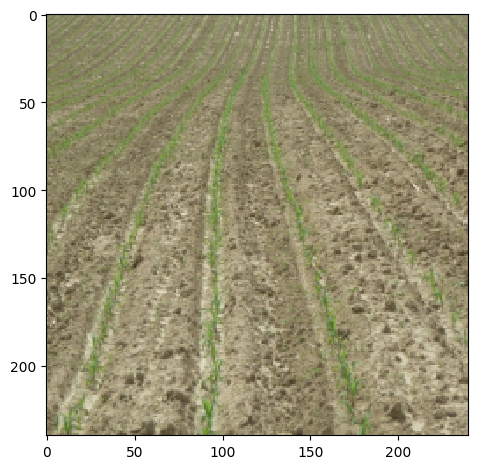

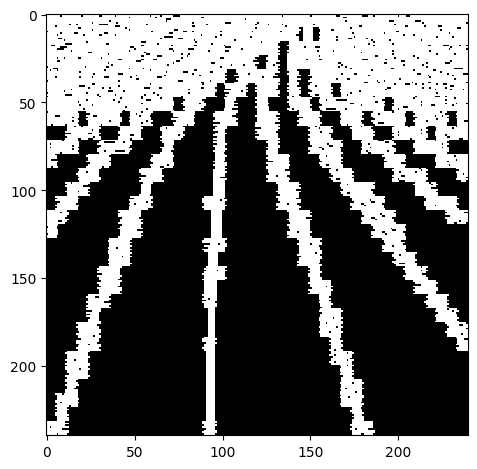

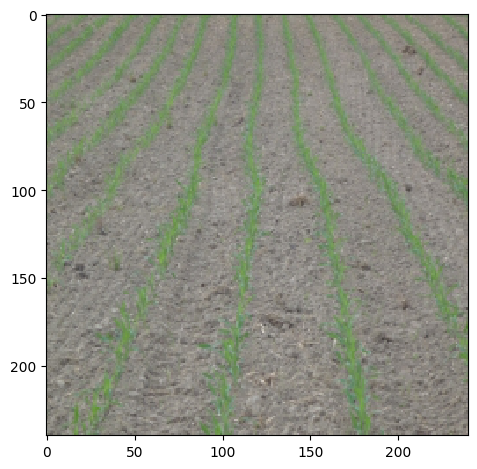

In [ ]:
#plota uma amostra
ix = random.randint(0, len(img_list_X_train))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(y_train[ix]))
plt.show()
imshow(np.squeeze(X_test[random.randint(0, len(img_list_X_test)-1)]))
plt.show()
# imshow(y_test[random.randint(0, len(img_list_y_test)-1)])
# plt.show()
# imshow(y_test_compare[random.randint(0, len(img_list_y_test_compare)-1)])
# plt.show()

In [ ]:
inputs = tf.keras.layers.Input(shape=(img_height, img_width, img_channels), name="input_image")
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

#Contractional path
cv1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), strides=(1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(s)
cv2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), strides=(1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(cv1)

#DS1
#fire module 1.1 
f1_1 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(cv2)
f1_1l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_1r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_1 = tf.keras.layers.concatenate([f1_1l,f1_1r])

#fire module 1.2
f1_2 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_2l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f1_2r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f1_2 = tf.keras.layers.concatenate([f1_2l,f1_2r])
f1_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1', padding="same")(f1_2)

#DS2
#fire module 2.1 
f2_1 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f2_1l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_1r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_1 = tf.keras.layers.concatenate([f2_1l,f2_1r])

#fire module 2.2
f2_2 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_2l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f2_2r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f2_2 = tf.keras.layers.concatenate([f2_2l,f2_2r])
f2_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool2', padding="same")(f2_2)


#DS3
#fire module 3.1 
f3_1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f3_1l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_1r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_1 = tf.keras.layers.concatenate([f3_1l,f3_1r])

#fire module 3.2
f3_2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_2l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f3_2r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f3_2 = tf.keras.layers.concatenate([f3_2l,f3_2r])
f3_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3', padding="same")(f3_2)

#DS4
#fire module 4.1 
f4_1 = tf.keras.layers.Conv2D(number_of_init_filters*5, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f4_1l = tf.keras.layers.Conv2D(number_of_init_filters*32, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_1r = tf.keras.layers.Conv2D(number_of_init_filters*32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_1 = tf.keras.layers.concatenate([f4_1l,f4_1r])

#fire module 4.2
f4_2 = tf.keras.layers.Conv2D(number_of_init_filters*5, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_2l = tf.keras.layers.Conv2D(number_of_init_filters*32, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_2)
f4_2r = tf.keras.layers.Conv2D(number_of_init_filters*32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f4_2)
f4_2 = tf.keras.layers.concatenate([f4_2l,f4_2r])
f4_2 = tf.keras.layers.Dropout(0.5)(f4_2)


#US1
#Transposed fire module
tf1_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*5, (1,1), strides=(1,1), padding='same', activation='relu')(f4_2)
tf1_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*16, (1,1), strides=(1,1), padding='same', activation='relu')(tf1_1)
tf1_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*16, (2,2), strides=(1,1), padding='same', activation='relu')(tf1_1)
tf1_1 = tf.keras.layers.concatenate([tf1_1l,tf1_1r])
tf1_1 = tf.keras.layers.concatenate([tf1_1,f3_2])

#fire module 5.1 
f5_1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf1_1)
f5_1l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_1r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_1 = tf.keras.layers.concatenate([f5_1l,f5_1r])

#fire module 5.2
f5_2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_2l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_2)
f5_2r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f5_2)
f5_2 = tf.keras.layers.concatenate([f5_2l,f5_2r])


#US2
#Transposed fire module
tf2_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (1,1), strides=(2,2), padding='same', activation='relu')(f5_2)
tf2_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*8, (1,1), strides=(1,1), padding='same', activation='relu')(tf2_1)
tf2_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*8, (2,2), strides=(1,1), padding='same', activation='relu')(tf2_1)
tf2_1 = tf.keras.layers.concatenate([tf2_1l,tf2_1r])
tf2_1 = tf.keras.layers.concatenate([tf2_1,f2_2])

#fire module 6.1 
f6_1 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf2_1)
f6_1l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_1r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_1 = tf.keras.layers.concatenate([f6_1l,f6_1r])

#fire module 6.2
f6_2 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_2l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_2)
f6_2r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f6_2)
f6_2 = tf.keras.layers.concatenate([f6_2l,f6_2r])


#US3
#Transposed fire module
tf3_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*3, (1,1), strides=(2,2), padding='same', activation='relu')(f6_2)
tf3_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (1,1), strides=(1,1), padding='same', activation='relu')(tf3_1)
tf3_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (2,2), strides=(1,1), padding='same', activation='relu')(tf3_1)
tf3_1 = tf.keras.layers.concatenate([tf3_1l,tf3_1r])
tf3_1 = tf.keras.layers.concatenate([tf3_1,f1_2])

#fire module 6.1 
f7_1 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf3_1)
f7_1l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_1r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_1 = tf.keras.layers.concatenate([f7_1l,f7_1r])

#fire module 6.2
f7_2 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_2l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_2)
f7_2r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f7_2)
f7_2 = tf.keras.layers.concatenate([f7_2l,f7_2r])

t9 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (2,2), strides=(2,2), padding='same', activation='relu')(f7_2)
c1 = tf.keras.layers.concatenate([t9,cv2])
cv3 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
cv4 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(cv3)


outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(cv4)


model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 240, 240, 3)  0           ['input_image[0][0]']            
                                                                                                  
 conv2d (Conv2D)                (None, 240, 240, 64  1792        ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [ ]:
#Model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

name = "SqueezeUnet-{}".format(int(time.time()))
callbacks = [ 
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.TensorBoard(log_dir='tensorboard/{}'.format(name))]

results = model.fit(X_train, y_train, validation_split=0.1, batch_size=4, epochs=20, callbacks=callbacks)

model.save("SqueezeUnet.h5")

Epoch 1/20
48/48 [==============================] - 46s 269ms/step - loss: 0.6076 - accuracy: 0.6889 - val_loss: 0.5482 - val_accuracy: 0.7242
Epoch 2/20
48/48 [==============================] - 9s 188ms/step - loss: 0.5748 - accuracy: 0.7110 - val_loss: 0.5409 - val_accuracy: 0.7277
Epoch 3/20
48/48 [==============================] - 9s 188ms/step - loss: 0.5560 - accuracy: 0.7212 - val_loss: 0.5302 - val_accuracy: 0.7342
Epoch 4/20
48/48 [==============================] - 9s 190ms/step - loss: 0.5500 - accuracy: 0.7287 - val_loss: 0.5584 - val_accuracy: 0.7311
Epoch 5/20
48/48 [==============================] - 9s 191ms/step - loss: 0.5542 - accuracy: 0.7339 - val_loss: 0.5506 - val_accuracy: 0.7047
Epoch 6/20
48/48 [==============================] - 9s 191ms/step - loss: 0.5457 - accuracy: 0.7280 - val_loss: 0.5271 - val_accuracy: 0.7385
Epoch 7/20
48/48 [==============================] - 9s 192ms/step - loss: 0.5338 - accuracy: 0.7371 - val_loss: 0.5261 - val_accuracy: 0.7299
Epoch

3/3 [==============================] - 1s 387ms/step


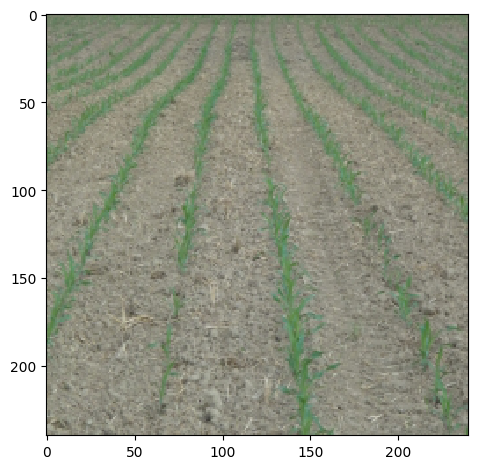

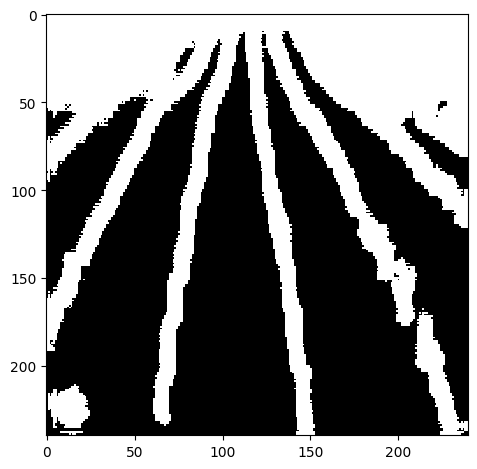

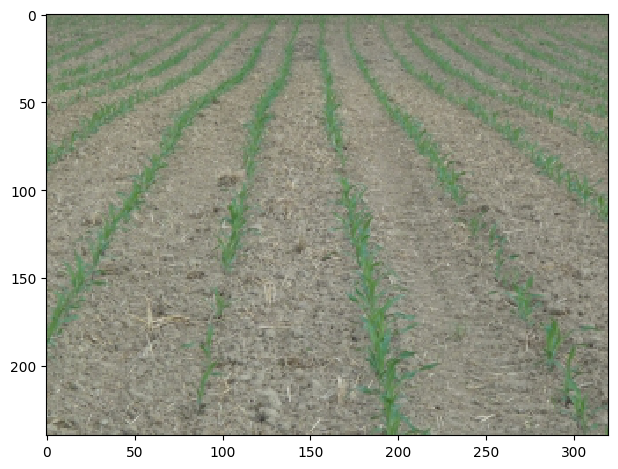

NameError: ignored

In [81]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

preds_train_t = (preds_train >0.5).astype(np.uint8)
preds_val_t = (preds_val >0.5).astype(np.uint8)
preds_test_t = (preds_test >0.5).astype(bool)

idx = random.randint(0, len(preds_test_t)-1)
imshow(X_test[idx])
plt.show()
imshow(preds_test_t[idx])
plt.show()
imshow(img_list_X_test[idx])
plt.show()
imshow(y_test_compare[idx])
plt.show()